Naveeda Ali 
<br>
Due date: Feb. 27, 2024, 11:59pm
<br>
PHYS 2030 W24


# <center><font color=#46769B>Homework assignment 6</font></center>

__Rubric (100 points total)__:

- Problem 1a - __10 points__

- Problem 1b - __10 points__
     
- Problem 2 - __20 points__

- Problem 3 - __20 points__

- Problem 4 - __20 points__

- Problem 5 - __20 points__

</font>

## <font color=#46769B>Introduction: Multivariate MCMC simulations</font>

In this Assignment, you will gain further practice with the Metropolis algorithm for MCMC simulations. In particular, you will generalize the algorithm to handle multivariate problems. Let's mention how this works.


### <font color=#46769B>Review of univariate MCMC sampling</font>

For a univariate problem, suppose we want $N$ samples for $x$ from a given PDF $P(x)$. We start with our first sample, $x_0$, which is the initial value in the chain:

```py
x = [x0]
```

Then you have a `for` loop that does the Metropolis algorithm to get the remaining $N-1$ samples one at a time. During each iteration $i$, the goal is to compute the next sample $x_{i+1}$ given the previous sample $x_i$. The algorithm does the following steps:

- Generate a new proposed sample for $x$ from the transition probability distribution $Q(x|x_i)$. In practice, we will always use a normal distribution that is centered at the previous sample $x_i$, i.e., $\mathcal{N}(x_i,\sigma_q)$. So, getting the proposed sample is done by

```py
x_new = np.random.normal(x[i],sigma_q)
```

- Calculate the acceptance ratio $A = P(x)/P(x_i)$. The code would be

```py
A = P(x_new) / P(x[i])
```

- Accept/reject step, as discussed in the Lecture Notes. If the proposed sample is accepted, you do
```py
x.append(x_new)
```
or else the point is rejected and you repeat the previous sample:
```py
x.append(x[i])
```

Lastly, note that we are free to choose the initial sample $x_0$ (a good choice avoids a long burn-in period) and the step-width $\sigma_q$ (a good choice has a just-right acceptance ratio).


### <font color=#46769B>Multivariate MCMC sampling</font>

Now, let's say we want to generate samples for two variables $x,y$ from a multivariate PDF $P(x,y)$ using the Metropolis algorithm. Here is how to modify the algorithm to handle two variables.

First, we have *two* chains, one list of samples for $x$ and another one for $y$. We start with our initial values for both, $x_0$ and $y_0$:

```py
x = [x0]
y = [y0]
```

Then you have a `for` loop to get the remaining $N-1$ samples for *both* $x$ and $y$. During each iteration $i$, you compute the next samples $x_{i+1}$, $y_{i+1}$ given the previous samples $x_i$, $y_i$. The algorithm does the following steps:

- Generate a new proposed samples for $x,y$. We will assume that both variables have their own independent transition probabilities, $Q_x(x|x_i)$ and $Q_y(y|y_i)$, which are both normal distributions but with *different* step-widths $\sigma_x$ and $\sigma_y$. Getting the proposed sample is done by
```py
x_new = np.random.normal(x[i],sigma_x)
y_new = np.random.normal(y[i],sigma_y)
```

- Calculate the acceptance ratio $A = P(x,y)/P(x_i,y_i)$. The code would be

```py
A = P(x_new,y_new) / P(x[i],y[i])
```

- Accept/reject step, as discussed in the Lecture Notes. If the proposed samples are accepted, you do
```py
x.append(x_new)
y.append(y_new)
```
or else the samples are rejected and you repeat the previous ones:
```py
x.append(x[i])
y.append(y[i])
```

Note that *all proposed samples are accepted or rejected together*. You only check acceptance or rejection *once* and it applies to *both* proposed samples for $x$ and $y$.

Lastly, note that you are free to choose $x_0, y_0$ and $\sigma_x,\sigma_y$. You can tune all four numbers to optimize your simulation (avoid burn-in and have a just-right acceptance fraction).



Our goals for this notebook are:
- Gain more experience Markov Chain Monte Carlo simulations and multivariate distributions

Required reading:
- *Lesson 5: Multivariate distributions*
- *Lesson 6: Markov Chain Monte Carlo*


## <font color=#46769B>Problem 1: Practice with multivariate normal distributions</font>

Let's consider a PDF $P(x,y)$ that is a multivariate normal distribution of two variables $x,y$:

$$ P(x,y) = 
\frac{1}{2\pi \sqrt{\det(C)}} \, \exp\left(-\frac{1}{2} (\vec{r} - \vec{\mu})^\intercal C^{-1} (\vec{r} - \vec{\mu})\right) \, . 
\qquad (1)$$

where $\vec{r} = (x,y)$ denotes our variables as a two-component vector, $\mu = (\mu_x,\mu_y)$ denotes the mean (similarly expressed as a vector), and $C$ is the $2 \times 2$ covariance matrix.

Let's take the following fixed values:

$$\mu_x = 1.2, \quad \mu_y = 2.5, \quad C = \left( \begin{array}{cc} 0.10 & -0.12 \\ -0.12 & 0.20 \end{array} \right)$$ 

Your tasks below will involve generating samples for $x,y$ in two different ways and plotting a 2D histogram. For all your histograms: 

- Add a title that indicates which part or method you used, (e.g., "Part (a): direct sampling" is a good title).

- Add axis labels

- Choose the same binning for your histograms by setting the keyword `bins=(np.linspace(0,5),np.linspace(0,5))`, which will set 50 bins spanning $[0,5]$ along both axes.

For all your simulations, generate $N=10^5$ samples in each part.

### <font color=#46769B>Part (a): Direct sampling</font>

The easiest method to sample from $P(x,y)$ is using `numpy`'s built-in function `numpy.random.multivariate_normal()`, which will give us a cross-check when we practice our MCMC sampling methods in Part (b).

Your tasks are as follows:

- Sample $x,y$ from $P(x,y)$ directly using `numpy.random.multivariate_normal()` and plot a 2D histogram of your samples. 

- Compute the means $\langle x \rangle$, $\langle y \rangle$ and compare to $\mu_x, \mu_y$. 

- Compute the covariance matrix of your samples and compare to $C$.

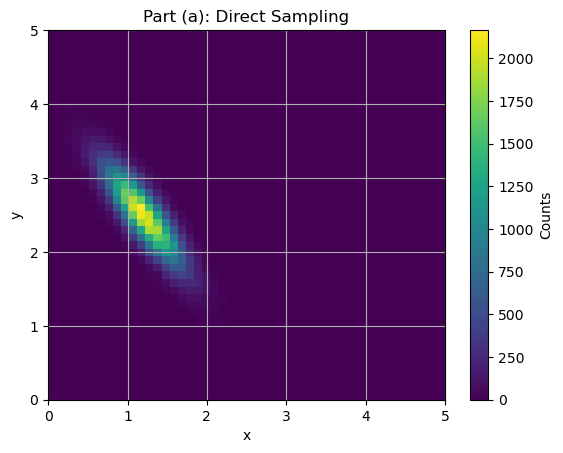

The mean of x is  1.1994686908483019 while the value of mu x is 1.2
The difference calculated between mean of x to mu of x is -0.0005313091516980784
The mean of y is 2.5009714220489148 while the value of mu y is 2.5
The difference calculated between mean of y to mu of y is 0.0009714220489147607
The covariance matrix calculated from the samples is
[[ 0.09963399 -0.11955919]
 [-0.11955919  0.19932964]]
Comparing the calculated covariance matrix to the actual covariance matrix we get
[[-0.00036601  0.00044081]
 [ 0.00044081 -0.00067036]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Given parameters
mu_x = 1.2
mu_y = 2.5
covariance_matrix = np.array([[0.1, -0.12],
                              [-0.12, 0.2]])

#Number of samples
num = 10**5

#Sampling directly from multivariate normal distribution 
samples = np.random.multivariate_normal(mean=[mu_x, mu_y], cov=covariance_matrix, size=num)
x_samples = samples[:, 0]
y_samples = samples[:, 1]

#Plot samples 
plt.hist2d(x_samples, y_samples, bins=(np.linspace(0, 5), np.linspace(0, 5)))
plt.colorbar(label='Counts')
plt.title('Part (a): Direct Sampling')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

#Calculate means of samples
mean_x = np.mean(x_samples)
mean_y = np.mean(y_samples)
print("The mean of x is ", mean_x, "while the value of mu x is", mu_x)
print("The difference calculated between mean of x to mu of x is", mean_x - mu_x)
print("The mean of y is", mean_y, "while the value of mu y is", mu_y)
print("The difference calculated between mean of y to mu of y is", mean_y - mu_y)

#Calculated covariance matrix
covariance_matrix_cal = np.cov(x_samples, y_samples)
print("The covariance matrix calculated from the samples is")
print(covariance_matrix_cal)
print("Comparing the calculated covariance matrix to the actual covariance matrix we get")
print(covariance_matrix_cal - covariance_matrix)


### <font color=#46769B>Part (b): MCMC sampling</font>

Sample $x,y$ from $P(x,y)$ using an MCMC simulation with the Metropolis algorithm.

- Plot the first 1000 values of chains for $x$ and $y$ (you can plot them both in the same figure, but include a legend) and print the acceptance fraction.

- Plot a 2D histogram of your samples.

- Compute the means $\langle x \rangle$, $\langle y \rangle$ and compare to $\mu_x, \mu_y$. 

- Compute the covariance matrix of your samples and compare to $C$.

Choose your initial values $x_0,y_0$ and step-widths $\sigma_x, \sigma_y$ so that you have no burn-in period and your acceptance fraction is in the range $30-50\%$.

Hint: You will need to define $P(x,y)$ with a `def` statement. If you want to use `numpy`'s built-in functions for matrix multiplication, see documentation [here](https://numpy.org/devdocs/reference/generated/numpy.matmul.html). In particular, you can use the `@` operator for matrix-multiplying `numpy` arrays. Here is an example:
```py
M = np.array([[1,2],[3,4]])
b = np.array([0,-1])
```
Then `M @ b` will return $M \cdot \vec{b}$ (matrix multiplication, treating $\vec{b}$ as a column vector) and `b @ M` will return $\vec{b} \cdot M$ (treating $b$ as a row vector).

Acceptance Fraction: 38.335 %


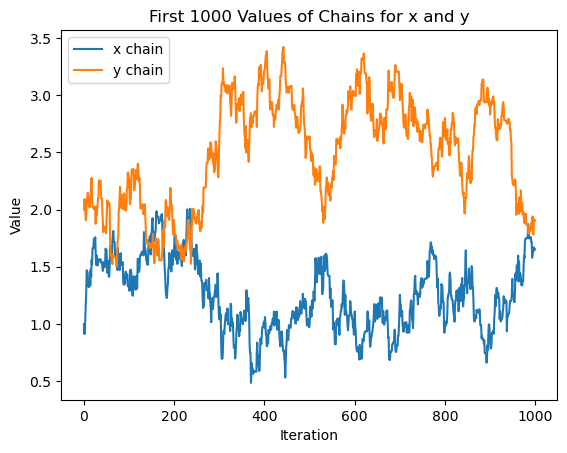

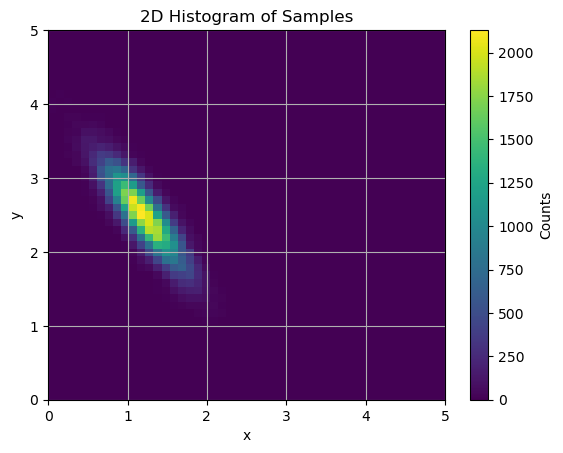

The mean of x is  1.2062740211589928 while the value of mu x is 1.2
The difference calculated between mean of x to mu of x is 0.006274021158992893
The mean of y is 2.494999224249231 while the value of mu y is 2.5
The difference calculated between mean of y to mu of y is -0.005000775750768849
The covariance matrix calculated from the samples is
[[ 0.09865335 -0.11828615]
 [-0.11828615  0.1967584 ]]
Comparing the calculated covariance matrix to the actual covariance matrix we get
[[-0.00134665  0.00171385]
 [ 0.00171385 -0.0032416 ]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt


#Given parameters
mu_x = 1.2
mu_y = 2.5
covariance_matrix = np.array([[0.1, -0.12],
                              [-0.12, 0.2]])

#Target PDF
def P(x, y, mu_x, mu_y, covariance_matrix):
    r = np.array([x, y])
    mu = np.array([mu_x, mu_y])
    diff = r - mu
    inv_cov = np.linalg.inv(covariance_matrix)
    exponent = -0.5 * diff.T@inv_cov@diff
    det_cov = np.linalg.det(covariance_matrix)
    coefficient = 1 / (2 * np.pi * np.sqrt(det_cov))
    return coefficient * np.exp(exponent)

#Number of samples
num = 10**5

#Step widths
sigma_x = 0.1
sigma_y = 0.1

#Initial values
x0 = 1.0
y0 = 2.0

x_chain = [x0]
y_chain = [y0]
acceptances = 0

for i in range(num-1):
    x_old = x_chain[i]
    y_old = y_chain[i]
    
    # Generate proposed sample for x and y
    x_new = np.random.normal(x_old, sigma_x)
    y_new = np.random.normal(y_old, sigma_y)
        
    # Calculate acceptance ratio
    A = P(x_new, y_new, mu_x, mu_y, covariance_matrix) / P(x_old, y_old, mu_x, mu_y, covariance_matrix)

    # Accept/reject step
    if A > 1:
        x_chain.append(x_new)
        y_chain.append(y_new)
        acceptances += 1
    else:
        r = np.random.rand()
        if r < A:
            x_chain.append(x_new)
            y_chain.append(y_new)
        else:
            x_chain.append(x_old)
            y_chain.append(y_old)

    acceptance_fraction = acceptances / num * 100
print("Acceptance Fraction:", acceptance_fraction, "%")

# Plot the first 1000 values of chains for x and y
plt.plot(x_chain[:1000], label='x chain')
plt.plot(y_chain[:1000], label='y chain')
plt.title('First 1000 Values of Chains for x and y')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

#Plot a 2D histogram of the samples
plt.hist2d(x_chain, y_chain, bins=(np.linspace(0, 5), np.linspace(0, 5)), cmap='viridis')
plt.colorbar(label='Counts')
plt.title('2D Histogram of Samples')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

#Calculate means of samples
mean_x = np.mean(x_chain)
mean_y = np.mean(y_chain)
print("The mean of x is ", mean_x, "while the value of mu x is", mu_x)
print("The difference calculated between mean of x to mu of x is", mean_x - mu_x)
print("The mean of y is", mean_y, "while the value of mu y is", mu_y)
print("The difference calculated between mean of y to mu of y is", mean_y - mu_y)

#Calculated covariance matrix
samples = np.array([x_chain, y_chain]).T
covariance_matrix_cal = np.cov(samples, rowvar=False)
print("The covariance matrix calculated from the samples is")
print(covariance_matrix_cal)
print("Comparing the calculated covariance matrix to the actual covariance matrix we get")
print(covariance_matrix_cal - covariance_matrix)


## <font color=#46769B>Problem 2: Inverse problems with MCMCs</font>

We revisit our data from Exercise 4, Part (c). Suppose we have 10 different (independent) measurements of the gravitational acceleration constant $g$. These are (in ${\rm m/s^2}$):

$$9.74 \pm 0.12,  \; 9.44 \pm 0.30,  \; 9.68 \pm 0.10, \; 10.02 \pm 0.38, \; 9.84 \pm 0.36, \;
        9.88 \pm 0.25,  \; 9.24 \pm 0.50,  \; 9.99 \pm 0.15,  \; 9.58 \pm 0.40,  \; 9.45 \pm 0.40 $$
        
We will denote $\mu$ as all the central values and $\sigma$ as all the uncertainties listed above. 

Your task is to perform an MCMC simulation to generate $N=10^5$ samples for $g$, to determine the best value and its uncertainty. Here are the steps you must follow:

- Define your target PDF $P(g) = e^{-\tfrac{1}{2} \chi^2(g)}$ (using a `def` statement) where $\chi^2(g)$ is a function of $g$ and is defined as

$$\chi^2(g) =  \sum_k \frac{(g - \mu_k)^2}{\sigma_k^2} $$ 

- Pick an initial value for your chain, $g_0$, and initialize your chain $[g_0]$.

- Write a code for the Metropolis algorithm to generate a total of $N=10^5$ samples in your chain. Draw each proposed value of $g$ from a normal distribution $Q(g|g^\prime)$ of width $\sigma_q$.

- Plot the first 1000 entries of your chain for $g$.

- Choose your initial value $g_0$ and $\sigma_q$ such that there is no obvious burn-in for your plot and such that the acceptance fraction is in the range $30\% - 50\%$.

Hint: You may need to run your algorithm a few times. A good way to tune your $g_0$ and $\sigma_q$ is to take the last sample of the previous run as your guess for $g_0$ for the next run, and the standard deviation of your samples as your guess for $\sigma_q$.

- After you are satistfied with your chain, calculate the mean and standard deviation of your chain for $g$. This is the combined central value and error. (The result should be the same as what you got in Ex. 4.)

The acceptance fraction is 34.754000000000005 %


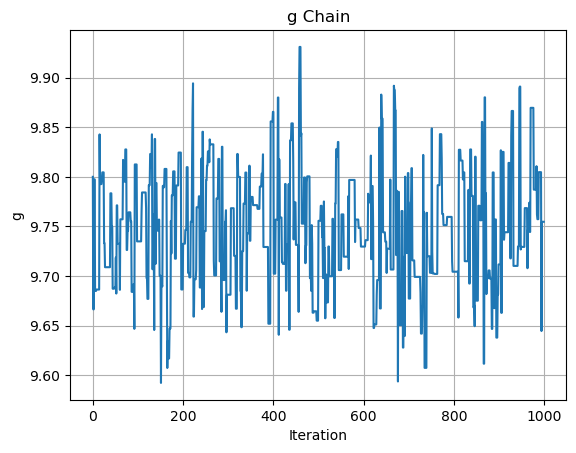

The mean of g is 9.747605906530985
The Standard deviation of g is 0.06090421648507742


In [3]:
import numpy as np
import matplotlib.pyplot as plt

#Data is here (central values and uncertainties)
mu = np.array([9.74, 9.44, 9.68, 10.02, 9.84, 9.88, 9.24, 9.99, 9.58, 9.45])
sigma = np.array([0.12, 0.30, 0.10, 0.38, 0.36, 0.25, 0.50, 0.15, 0.40, 0.40])

#Target PDF
def P(g, mu, sigma):
    chi_squared = np.sum(((g - mu)**2 / sigma**2))
    return np.exp(-0.5 * chi_squared)

#Number of samples
num = 10**5

g0 = 9.8
sigma_q = 0.2

g_chain = [g0]
acceptances = 0

for i in range(num - 1):
    g_old = g_chain[i]
    # Generate proposed sample for g
    g_new = np.random.normal(g_old, sigma_q)
        
    # Calculate acceptance ratio
    A = P(g_new, mu, sigma) / P(g_old, mu, sigma)

    # Accept/reject step
    if A > 1:
        g_chain.append(g_new)
        acceptances += 1
    else:
        r = np.random.rand()
        if r<A:
            g_chain.append(g_new)
            acceptances += 1
        else: 
            g_chain.append(g_old)
            
    acceptance_fraction = acceptances / num * 100


# Print acceptance fraction
print("The acceptance fraction is", acceptance_fraction, "%")

# Plot the first 1000 values of the chain for g
plt.plot(g_chain[:1000])
plt.title('g Chain')
plt.xlabel('Iteration')
plt.ylabel('g')
plt.grid(True)
plt.show()

# Calculate mean and standard deviation of the chain for g
mean_g = np.mean(g_chain)
std_dev_g = np.std(g_chain)

print("The mean of g is", mean_g)
print("The Standard deviation of g is", std_dev_g)


## <font color=#46769B>Problem 3: More data fitting with MCMCs</font>

Let's revisit Assignment 4, Problem 3. Consider an object that starts at rest and moves with a uniform acceleration due to gravity. Let $y(t)$ denote the distance fallen in time $t$.

Suppose we have the results of 5 experiments for $y(t)$ (in meters) at 5 different times

$$y(t_1) = 4.7 \pm 0.7, \; y(t_2) = 17.7 \pm 1.5, \; y(t_3) = 45.5 \pm 3.0, \; y(t_4) = 75.8 \pm 9.0 , \; 
y(t_5) = 117.4 \pm 10.0 \; .$$

where the times are (in seconds)

$$t_1 = 1 , \; t_2 = 2, \; t_3 = 3 , \; t_4 = 4 , \; t_5 = 5 \; .$$ 

Your task is to perform an MCMC simulation using the Metropolis algorithm to generate $N=10^5$ samples for $g$, to determine the best value and its uncertainty. Repeat all the steps as in Problem 2. 

Here the only difference with Problem 2 is your $\chi^2(g)$ function:

$$\chi^2(g) =  \sum_k \frac{(y(g,t_k) - \mu_k)^2}{\sigma_k^2} $$ 

where central values of the data are labeled $\mu$, the uncertainties of the data are $\sigma$, $y(g,t) = \tfrac{1}{2} g t^2$ is the model calculated at each time $t$, and $k$ indexes each of the five data points.

The result should be the same as what you got in Assignment 4.


The Acceptance Fraction is 45.898 %


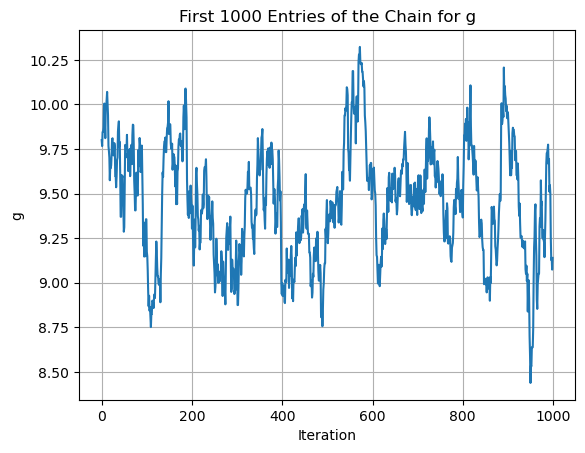

The mean of g is 9.49496589081581
The standard deviation of g is 0.3772865200153262


In [4]:
import numpy as np
import matplotlib.pyplot as plt
# Data
mu = np.array([4.7, 17.7, 45.5, 75.8, 117.4])
sigma = np.array([0.7, 1.5, 3.0, 9.0, 10.0])
t = np.array([1, 2, 3, 4, 5])

# Number of samples
num = 10**5

# Initial value for g and width of proposal distribution
g0 = 9.8
sigma_q = 0.1

# Model function y(g, t) = 1/2 * g * t^2
def y(g, t):
    return 0.5 * g * t**2

# Chi-square function
def chi_squared(g, mu, sigma, t):
    return np.sum(((y(g, t) - mu) / sigma)**2)

# Target PDF
def P(g, mu, sigma, t):
    return np.exp(-0.5 * chi_squared(g, mu, sigma, t))

# Metropolis algorithm
g_chain = [g0]
acceptances = 0

for i in range(num-1):
    g_old = g_chain[i]
    # Generate proposed sample for g
    g_new = np.random.normal(g_old, sigma_q)
        
    # Calculate acceptance ratio
    A = P(g_new, mu, sigma, t) / P(g_old, mu, sigma, t)

    # Accept/reject step
    if A > 1:
        g_chain.append(g_new)
        acceptances += 1
    else:
        r= np.random.rand()
        if r<A:
            g_chain.append(g_new)
        else:
            g_chain.append(g_old)

    acceptance_fraction = acceptances / num * 100


# Print acceptance fraction
print("The Acceptance Fraction is", acceptance_fraction, "%")

# Plot the first 1000 values of the chain for g
plt.plot(g_chain[:1000])
plt.title('First 1000 Entries of the Chain for g')
plt.xlabel('Iteration')
plt.ylabel('g')
plt.grid(True)
plt.show()

# Calculate mean and standard deviation of the chain for g
mean_g = np.mean(g_chain)
std_dev_g = np.std(g_chain)

print("The mean of g is", mean_g)
print("The standard deviation of g is", std_dev_g)

## <font color=#46769B>Problem 4: Rotation curves (again)</center>

Next, we will revisit our fits to rotation curve data for IC2574, this time using the Metropolis MCMC algorithm. First, let's recap the setup. We have a model for the circular velocity

$$v(r,M_{\rm tot},a) = \sqrt{ \frac{G M_{\rm tot} r^2}{(r + R_s)^3 } } $$

where the two unknown parameters are

- $M_{\rm tot}$ is the total mass in $M_\odot$ units. This is the parameter of interest, *the total mass of the galaxy*.

- $R_s$ is a length parameter, in units of kiloparsecs (${\rm kpc}$).

Also, Newton's constant is

$$G = 4.3 \times 10^{-6} \; {\rm km^2/s^2 \, M_\odot^{-1} \, kpc} \; .$$

As in Assignment 5, we will use the following model for the circular velocity as a function of radial position $r$ in the galaxy

$$v(r,x,y) = \sqrt{ \frac{G r^2 10^y}{(r + 10^x)^3 } }  \qquad (2)$$

where $x,y$ are the two parameters that we will fit by Monte Carlo sampling. They are related to the enclosed mass by $M_{\rm tot} = 10^y$ and scale radius by $R_s = 10^x$.

The target PDF is

$$P(x,y) = e^{-\tfrac{1}{2} \chi^2(x,y)} $$

where 

$$\chi^2(x,y) = \sum_{k=1}^n \frac{(v(r_k,x,y) - \mu_k)^2}{\sigma_k^2}$$

and where the $\mu_k$, $\sigma_k$, $r_k$ are the circular velocity central values `mu`, errors `sigma`, and radius values `radius` corresponding to the data points (defined below).

First, let's load the data:

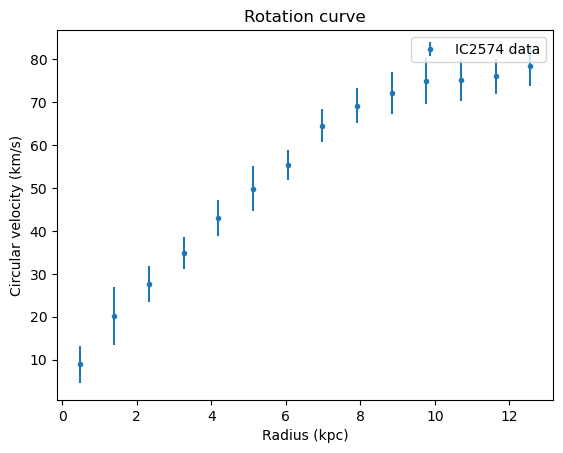

In [5]:
# Newton's constant
G = 4.3e-6

# Data

# radius (kpc) 
radius = np.array([ 0.465421,  1.39626 ,  2.3271  ,  3.25794 ,  4.18879 ,  5.11963 ,
                    6.05047 ,  6.98131 ,  7.91215 ,  8.84299 ,  9.77383 , 10.7047  ,
                   11.6355  , 12.5664  ])

# mean circular velocity v (km/s) 
mu = np.array([ 8.87, 20.15, 27.63, 34.81, 42.97, 49.89, 55.38, 64.56, 69.26,
               72.2 , 75.03, 75.13, 76.04, 78.38])

# error for circular velocity v (km/s) 
sigma = np.array([4.32, 6.81, 4.28, 3.79, 4.24, 5.15, 3.54, 3.81, 4.  , 4.84, 5.3 ,
                  4.79, 4.04, 4.55])
              
plt.errorbar(radius,mu,yerr=sigma,fmt='.',label='IC2574 data') 
plt.xlabel('Radius (kpc)')
plt.ylabel('Circular velocity (km/s)')
plt.title('Rotation curve')

plt.legend()
plt.show()

Now, your task is to fit $M_{\rm tot}$ and $R_s$ for IC2574 using the Metropolis MCMC algorithm to sample the parameters $x,y$. Specifically, do the following tasks:

- Define your target PDF $P(x,y)$ defined above using a `def` statement.

- Pick initial values for your chain, $x_0,y_0$.

- Write a code for the Metropolis algorithm to generate a total of $N=10^5$ samples for $x$ and $y$. Assume that the proposal distributions for $x$ and $y$ are each a univariate normal distribution with step-widths $\sigma_x$ and $\sigma_y$ that are numbers chosen by you.

- Plot the first 1000 entries of your chains for $x$ and $y$ (on separate plots). Label each plot.

- Plot a 2D histogram of your chain, where $x$ is on the $x$-axis and $y$ is on the $y$-axis.

- Choose your initial values and step widths such that there is no obvious burn-in for your plot and such that the acceptance fraction is in the range $30\% - 50\%$.

- After you are satistfied with your chains, calculate the mean and standard deviation for $M_{\rm tot}$, which represent the central value and uncertainty on your fit for $M_{\rm tot}$.

Hint: You may need to run your algorithm a few times, and tune your initial values and step widths.

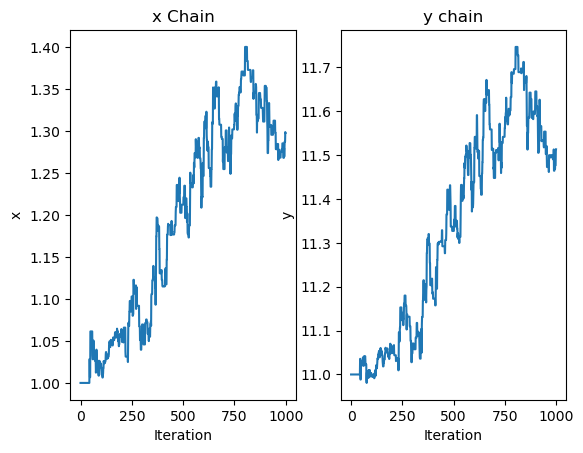

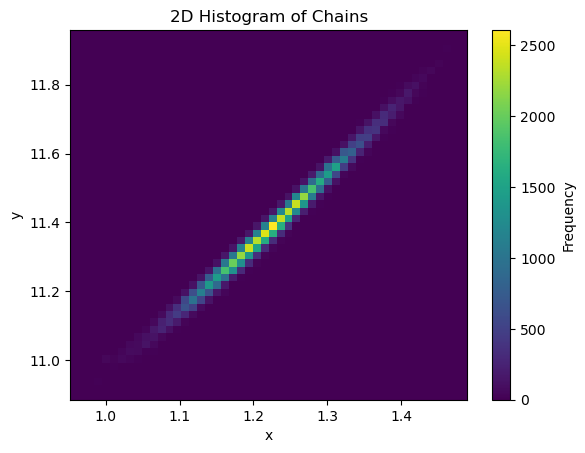

The mean of M_tot is 260398107850.44067
The standard deviation of M_tot: is 93237806825.0277
The acceptance fraction is 33.986339863398634 %


In [11]:
import numpy as np
import matplotlib.pyplot as plt

#Newton's constant
G = 4.3e-6

#Data
radius = np.array([0.465421, 1.39626, 2.3271, 3.25794, 4.18879, 5.11963,
                   6.05047, 6.98131, 7.91215, 8.84299, 9.77383, 10.7047,
                   11.6355, 12.5664])
mu = np.array([8.87, 20.15, 27.63, 34.81, 42.97, 49.89, 55.38, 64.56,
               69.26, 72.2, 75.03, 75.13, 76.04, 78.38])
sigma = np.array([4.32, 6.81, 4.28, 3.79, 4.24, 5.15, 3.54, 3.81, 4.0,
                  4.84, 5.3, 4.79, 4.04, 4.55])

#Define chi-squared function
def chi_sq(x, y):
    vr = np.sqrt((G * (10**y)) * radius**2 / (radius + (10**x))**3)
    chi_square = np.sum(((vr - mu) / sigma)**2)
    return chi_square

def P(x, y):
    if x < 0 or y < 0:
        return 10**-9
    else:
        return np.exp(-0.5 * chi_sq(x, y))

num = 10**5

#Initial values and step widths
x0 = 1.0
y0 = 11.0
sigma_x = 0.7
sigma_y = 1.2

x_chain = [x0]
y_chain = [y0]
acceptances = 0
max_acceptance_fraction = 50  
min_acceptance_fraction = 30  
acceptance_tolerance = 5      
sigma_x_adjust = sigma_x      
sigma_y_adjust = sigma_y      

for i in range(num - 1):
    x_old = x_chain[i]
    y_old = y_chain[i]
    x_new = np.random.normal(x_old, sigma_x_adjust)
    y_new = np.random.normal(y_old, sigma_y_adjust)
    
    A = P(x_new, y_new) / P(x_old, y_old)
    
    if A > 1:
        x_chain.append(x_new)
        y_chain.append(y_new)
        acceptances += 1
    else:
        r = np.random.rand()
        if r < A:
            x_chain.append(x_new)
            y_chain.append(y_new)
            acceptances += 1
        else:
            x_chain.append(x_old)
            y_chain.append(y_old)
    
    acceptance_fraction = acceptances / (i + 1) * 100
    
    #Find the optimal sigma for x and y that is within 50-30%
    if acceptance_fraction < min_acceptance_fraction:
        sigma_x_adjust *= 1 - acceptance_tolerance / 100
        sigma_y_adjust *= 1 - acceptance_tolerance / 100
    elif acceptance_fraction > max_acceptance_fraction:
        sigma_x_adjust *= 1 + acceptance_tolerance / 100
        sigma_y_adjust *= 1 + acceptance_tolerance / 100

#Plot first 1000 entries of chains for x and y
plt.subplot(1, 2, 1)
plt.plot(x_chain[:1000])
plt.xlabel('Iteration')
plt.ylabel('x')
plt.title('x Chain')


plt.subplot(1, 2, 2)
plt.plot(y_chain[:1000])
plt.xlabel('Iteration')
plt.ylabel('y')
plt.title('y chain')
plt.show()

# Plot 2D histogram of chain
plt.hist2d(x_chain, y_chain, bins=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Histogram of Chains')
plt.colorbar(label='Frequency')
plt.show()

# Calculate mean and standard deviation for M_tot
M_tot_samples = 10**np.array(y_chain)
M_tot_mean = np.mean(M_tot_samples)
M_tot_std = np.std(M_tot_samples)

print('The mean of M_tot is', M_tot_mean)
print('The standard deviation of M_tot: is', M_tot_std)
print('The acceptance fraction is', acceptance_fraction, "%")


## <font color=#46769B>Problem 5</font>

In our multivariate MCMC simulations in Problems 1 and 4, we assumed that each variable had an independent transition probability distribution. That is, we took $Q_x(x|x^\prime)$ to be a univariate normal distribution for $x$, with step-width $\sigma_x$, and $Q_y(y|y^\prime)$ to be a univariate normal distribution for $y$, with step-width $\sigma_y$. (Here we denote $x^\prime, y^\prime$ as the old values of $x,y$.)

In reality, there is actually a *multivariate* transition probability distribution $Q(x,y|x^\prime,y^\prime)$. We assumed that this distribution factorized and could be written as

$$Q(x,y|x^\prime,y^\prime) = Q_x(x|x^\prime) Q_y(y|y^\prime)$$

which allowed us to sample the proposed values of $x$ and $y$ *separately*.

However, if the target distribution $P(x,y)$ exhibits strong correlation in the variables, our MCMC simulations can be improved by including correlation in the transition distribution. This problem goes through how to implement this.

Your task is to repeat Problem 4 but instead of sampling $x,y$ each from univariate normal distributions with widths $\sigma_x$ and $\sigma_y$, you will sample them from a single multivariate normal distribution with covariance matrix $C$.

It is actually very easy to do this. Instead of these lines of code:
```py
x_new = np.random.normal(x[i],sigma_x)
y_new = np.random.normal(y[i],sigma_y)
```
you do this line of code
```py
x, y = np.random.multivariate_normal([x[i],y[i]],C)
```
This will generate your proposed values $x,y$ by sampling from a multivariate normal distribution centered at the old point $(x_i, y_i)$ with covariance $C$ (which plays the role of the step-width).

Now, repeat the steps of Problem 4, tuning $C$ until you get a suitable acceptance fraction ($30\% - 50\%$). Here is how to tune $C$:

- Take a starting guess for $C = {\rm diag}(0.001, 0.001)$. It works best if you take a small guess to start with.

- Run your MCMC algorithm with multivariate sampling a few times until you are able to tune $x_0,y_0$ to remove any burn-in period. Don't try to tune $C$ until there is no more burn-in in your simulation.

- Run your MCMC algorithm a few more times. After each time, recalculate the covariance $C$ and run again. 

- You can also multiply your matrix $C$ by an overall constant to tune your acceptance fraction.

Note: In the final version of your code, be sure to define explicitly your preferred $C$ matrix in your code. It must be the case that the TA running your code will get the results you intended. If in doubt, click on __Restart and Run All__ to make sure your entire code runs in one go as intended.


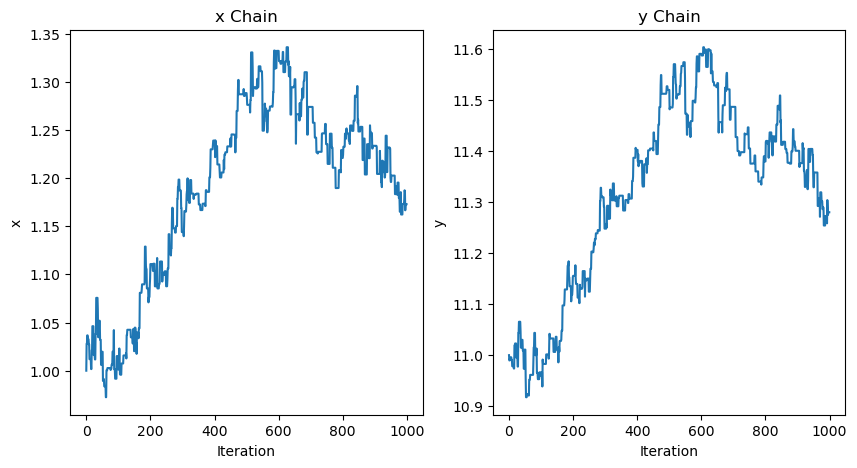

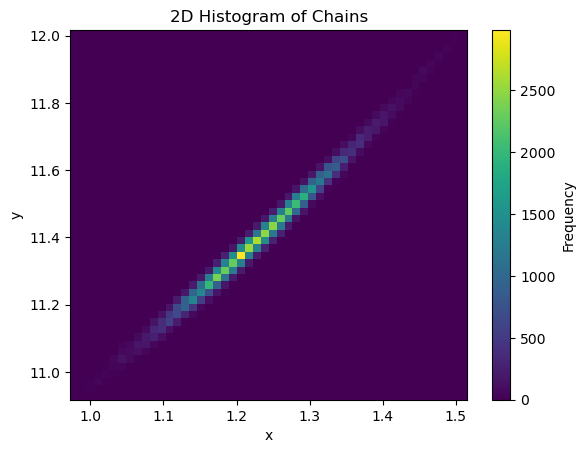

The Mean of M_tot is 2.6481853006433364e+16
The Standard Deviation of M_tot: 98318854667.24371
The Acceptance fraction is 31.259999999999998 %


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Newton's constant
G = 4.3e-6

# Data
radius = np.array([0.465421, 1.39626, 2.3271, 3.25794, 4.18879, 5.11963,
                   6.05047, 6.98131, 7.91215, 8.84299, 9.77383, 10.7047,
                   11.6355, 12.5664])
mu = np.array([8.87, 20.15, 27.63, 34.81, 42.97, 49.89, 55.38, 64.56,
               69.26, 72.2, 75.03, 75.13, 76.04, 78.38])
sigma = np.array([4.32, 6.81, 4.28, 3.79, 4.24, 5.15, 3.54, 3.81, 4.0,
                  4.84, 5.3, 4.79, 4.04, 4.55])


#Define chi-squared function
def chi_sq(x, y):
    vr = np.sqrt((G * (10**y)) * radius**2 / (radius + (10**x))**3)
    chi_square = np.sum(((vr - mu) / sigma)**2)
    return chi_square

def P(x, y):
    if x < 0 or y < 0:
        return 10**-9
    else:
        return np.exp(-0.5 * chi_sq(x, y))

num = 10**5
# Initial values and step widths
x0 = 1.0
y0 = 11.0
sigma_x = 0.07
sigma_y = 1.2

# Covariance matrix for multivariate normal distribution
C = np.diag([0.0008, 0.0008])  

# Metropolis algorithm
x_chain = [x0]
y_chain = [y0]
acceptances = 0

    
for i in range(num - 1):
    x_old = x_chain[i]
    y_old = y_chain[i]
    
    # Sample proposed values from multivariate normal distribution
    x_new, y_new = np.random.multivariate_normal([x_old, y_old], C)
    
    A = P(x_new, y_new) / P(x_old, y_old)
    
    if A > 1:
        x_chain.append(x_new)
        y_chain.append(y_new)
        acceptances += 1
    else:
        r = np.random.rand()
        if r < A:
            x_chain.append(x_new)
            y_chain.append(y_new)
            acceptances += 1
        else:
            x_chain.append(x_old)
            y_chain.append(y_old)
            
    acceptance_fraction = acceptances / num * 100
    

# Plot first 1000 entries of chains for x and y
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x_chain[:1000])
plt.xlabel('Iteration')
plt.ylabel('x')
plt.title('x Chain')

plt.subplot(1, 2, 2)
plt.plot(y_chain[:1000])
plt.xlabel('Iteration')
plt.ylabel('y')
plt.title('y Chain')
plt.show()

# Plot 2D histogram of chain
plt.hist2d(x_chain, y_chain, bins=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Histogram of Chains')
plt.colorbar(label='Frequency')
plt.show()

# Calculate mean and standard deviation for M_tot
M_tot_samples = 10 ** np.array(y_chain)
M_tot_mean = np.sum(M_tot_samples)
M_tot_std = np.std(M_tot_samples)

print('The Mean of M_tot is', M_tot_mean)
print('The Standard Deviation of M_tot:', M_tot_std)
print('The Acceptance fraction is', acceptance_fraction, "%")
